In [2]:
import pandas as pd
import numpy as np

## DSD Computation

In [3]:
! ls outputs/node2vec/


fission_yeast_biogrid_d_100_p_1_q_1_nw_10
logs
mouse_12000_biogrid_d_100_p_1_q_1_nw_10


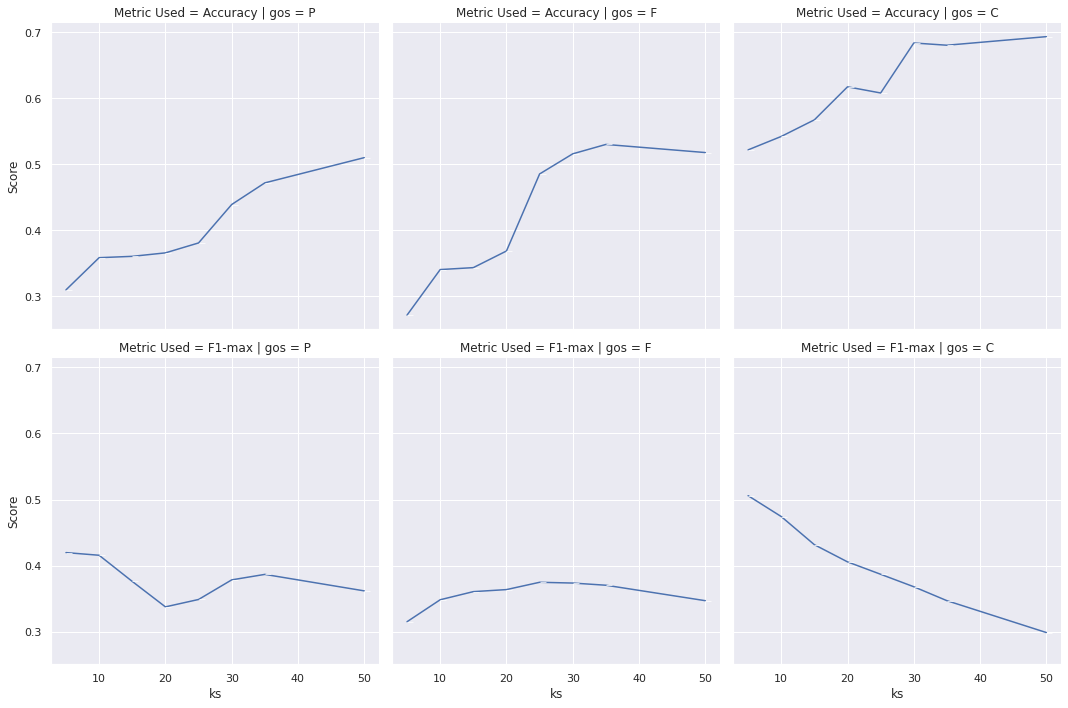

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

kdsd = [5, 10, 15, 20, 25, 30, 35, 50]
def generate_dsd_table_results(kvals, gos, folder):
    """
    Generating DSD results for different kvals
    """
    results = {"gos": [],
              "ks": [],
              "Score": [],
              "Metric Used": [],
              "std": []}
    for g in gos:
        for k in kvals:
            df = pd.read_csv(f"{folder}/{g}_k_{k}.tsv", sep = "\t")
            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("Accuracy")
            results["Score"].append(df["acc"].mean())
            results["std"].append(df["acc"].std())            
            results["gos"].append(g)
            results["ks"].append(k)
            results["Metric Used"].append("F1-max")
            results["Score"].append(df["f1"].mean())
            results["std"].append(df["f1"].std())
    df = pd.DataFrame(results)
    return df
dsd_df = generate_dsd_table_results(kdsd, ["P", "F", "C"], "outputs/dsd/fission_yeast_biogrid/")
p = sns.relplot(data = dsd_df, x="ks", y = "Score", row="Metric Used", col="gos", kind = "line", marker = True)
# SAVE the figure
# p.savefig("outputs/dsd/fission_yeast_biogrid/variation_with_k.png")

## Finding the MAX terms
### DSD

In [6]:
max_map = {"org": [], "method": [], "go": [], "metric": [], "best": []}
# DSD
for org in ["fission_yeast_biogrid", "mouse_12000_biogrid"]:
    dsd_org = generate_dsd_table_results(kdsd, ["P", "F", "C"], f"outputs/dsd/{org}/")
    res = dsd_org.groupby(["Metric Used", "gos"]).agg("max")
    for i, r in res.iterrows():
        max_map["org"].append(org)
        max_map["metric"].append(i[0])
        max_map["go"].append(i[1])
        max_map["best"].append(r["Score"])
        max_map["method"].append("dsd")

max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd'],
 'go': ['C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P', 'C', 'F', 'P'],
 'metric': ['Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max',
  'Accuracy',
  'Accuracy',
  'Accuracy',
  'F1-max',
  'F1-max',
  'F1-max'],
 'best': [0.6932203389830509,
  0.5299849501313675,
  0.5099977720842153,
  0.5058166230784495,
  0.37465687936906866,
  0.41960878464474344,
  0.658135897240672,
  0.4070404172099087,
  0.34250077202670626,
  0.46869181311236174,
  0.3391035156844055,
  0.2391417495826674]}

### MASHUP

In [7]:
for org in ["fission_yeast_biogrid.mashup.dim_1000", "mouse_12000_biogrid.mashup.dim_1000"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/mashup/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("mashup")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map

{'org': ['fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'fission_yeast_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid',
  'mouse_12000_biogrid'],
 'method': ['dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'dsd',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup',
  'mashup'],
 'go': ['C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'C',
  'F',
  'P',
  'F',
  'F',
 

### NODE2VEC

In [8]:
for org in ["fission_yeast_biogrid_d_100_p_1_q_1_nw_10", "mouse_12000_biogrid_d_100_p_1_q_1_nw_10"]:
        for go in ["F", "P", "C"]:
            dfmash = pd.read_csv(f"outputs/node2vec/{org}/{go}.tsv", sep = "\t")
            for metric in ["acc", "f1"]:
                max_map["method"].append("node2vec")
                max_map["org"].append("fission_yeast_biogrid" if org.startswith("fission") else "mouse_12000_biogrid")
                max_map["metric"].append("Accuracy" if metric == "acc" else "F1-max")
                max_map["go"].append(go)
                max_map["best"].append(dfmash[metric].mean())
max_map
df_mmap = pd.DataFrame(max_map)
df_mmap

,org,method,go,metric,best
0,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
1,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
2,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
3,fission_yeast_biogrid,dsd,C,F1-max,0.505817
4,fission_yeast_biogrid,dsd,F,F1-max,0.374657
5,fission_yeast_biogrid,dsd,P,F1-max,0.419609
6,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
7,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
8,mouse_12000_biogrid,dsd,P,Accuracy,0.342501
9,mouse_12000_biogrid,dsd,C,F1-max,0.468692


In [9]:
ks = [5, 10, 15, 20, 25, 30, 35]
alphas = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1.0"]
falphas = [float(a) for a in alphas]

def generate_table_results(kvals, alphas, gos, folder):
    """
    Generating the table from alphas and kvals
    """
    results = {"gos": [], 
               "ks": [], 
               "alphas": [], 
               "mean_acc": [], 
               "std_acc": [], 
               "mean_f1": [], 
               "std_f1": []}
    for go in gos:
        print(f"\tGO: {go}")
        for k in ks:
            print(f"\t\t K: {k}")
            for a in alphas:
                results["gos"].append(go)
                results["ks"].append(k)
                results["alphas"].append(a)
                
                df = pd.read_csv(f"{folder}/{go}_k_{k}_alpha_{a}.tsv", sep = "\t")
                
                results["mean_acc"].append(df["acc"].mean())
                results["mean_f1"].append(df["f1"].mean())
                results["std_acc"].append(df["acc"].std())
                results["std_f1"].append(df["f1"].std())
                print(f"\t\t\t ALPHA: {a}, Accuracy: {df['acc'].mean()} +- {df['acc'].std()}"
                      + f"\t\t\t                   F1: {df['f1'].mean()} +- {df['f1'].std()}")
    df = pd.DataFrame(results)
    return df
                
        

### UNIMUNDO - MOUSE - HUMAN

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

df_hm = generate_table_results(ks, alphas, ["P", "F", "C"], "outputs/unimundo/human_12000_biogrid-mouse_12000_biogrid/")
df_hm_acc = df_hm.drop(["mean_f1", "std_f1"], axis = 1)
df_hm_f1  = df_hm.drop(["mean_acc", "std_acc"], axis = 1)

df_hm_acc = df_hm_acc.rename(columns = {"mean_acc": "Score", "std_acc":"std"})
df_hm_f1 = df_hm_f1.rename(columns = {"mean_f1": "Score", "std_f1": "std"})
df_hm_acc["Metric Used"] = "Accuracy"
df_hm_f1["Metric Used"]  = "F1-max"

df_comp_hm = pd.concat([df_hm_acc, df_hm_f1]).reset_index()
df_comp_hm["std"] = df_comp_hm["std"] 
df_comp_hm["alphas"] = df_comp_hm["alphas"].astype(float)

	GO: P
		 K: 5
			 ALPHA: 0.05, Accuracy: 0.2151776321982201 +- 0.02050533717640289			                   F1: 0.2223573177982984 +- 0.004781612078879526
			 ALPHA: 0.1, Accuracy: 0.2149911898128805 +- 0.010715588800760765			                   F1: 0.22109498830183338 +- 0.01146220938545818
			 ALPHA: 0.2, Accuracy: 0.20844572445830148 +- 0.017369031437242527			                   F1: 0.22672537239985058 +- 0.012182452999230419
			 ALPHA: 0.4, Accuracy: 0.21680161308168286 +- 0.014420135403829297			                   F1: 0.21870071328566495 +- 0.010022929336174548
			 ALPHA: 0.6, Accuracy: 0.20516506508969545 +- 0.006234353538096261			                   F1: 0.1993410933383467 +- 0.003870497886930206
			 ALPHA: 0.8, Accuracy: 0.2018928278306132 +- 0.009129641914979128			                   F1: 0.19710281576195354 +- 0.00456694692079184
			 ALPHA: 1.0, Accuracy: 0.19771166330057513 +- 0.006605786243930383			                   F1: 0.1568569195575089 +- 0.010751072003442722
		 K: 10
			 ALPHA: 

			 ALPHA: 0.8, Accuracy: 0.6305946819897975 +- 0.004644839602647883			                   F1: 0.2901583592870618 +- 0.004633218828841384
			 ALPHA: 1.0, Accuracy: 0.6210166428549035 +- 0.011717929885779379			                   F1: 0.19620746141736395 +- 0.0019106206784298382
		 K: 25
			 ALPHA: 0.05, Accuracy: 0.6395748144697888 +- 0.01120091186834318			                   F1: 0.37770438488352676 +- 0.005633074577222135
			 ALPHA: 0.1, Accuracy: 0.644812879849874 +- 0.0103845080639722			                   F1: 0.37499058398198704 +- 0.010117160670905716
			 ALPHA: 0.2, Accuracy: 0.6481095400821394 +- 0.014058043698546864			                   F1: 0.3383258500920884 +- 0.0054919330175128385
			 ALPHA: 0.4, Accuracy: 0.6389808266787294 +- 0.018337234761698497			                   F1: 0.297102418301193 +- 0.006302059309652179
			 ALPHA: 0.6, Accuracy: 0.632540901741767 +- 0.004461916982697106			                   F1: 0.2630348670747147 +- 0.0026159716864945968
			 ALPHA: 0.8, Accuracy: 0.626

In [11]:
df_mmap["id"] = df_mmap["org"] + "-" + df_mmap["method"] + "-" + df_mmap["go"] + "-" + df_mmap["metric"]
df_mmap       = df_mmap.set_index("id")
df_mmap

,org,method,go,metric,best
id,,,,,
fission_yeast_biogrid-dsd-C-Accuracy,fission_yeast_biogrid,dsd,C,Accuracy,0.693220
fission_yeast_biogrid-dsd-F-Accuracy,fission_yeast_biogrid,dsd,F,Accuracy,0.529985
fission_yeast_biogrid-dsd-P-Accuracy,fission_yeast_biogrid,dsd,P,Accuracy,0.509998
fission_yeast_biogrid-dsd-C-F1-max,fission_yeast_biogrid,dsd,C,F1-max,0.505817
fission_yeast_biogrid-dsd-F-F1-max,fission_yeast_biogrid,dsd,F,F1-max,0.374657
fission_yeast_biogrid-dsd-P-F1-max,fission_yeast_biogrid,dsd,P,F1-max,0.419609
mouse_12000_biogrid-dsd-C-Accuracy,mouse_12000_biogrid,dsd,C,Accuracy,0.658136
mouse_12000_biogrid-dsd-F-Accuracy,mouse_12000_biogrid,dsd,F,Accuracy,0.407040
mouse_12000_biogrid-dsd-P-Accuracy,mouse_12000_biogrid,dsd,P,Accuracy,0.342501


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

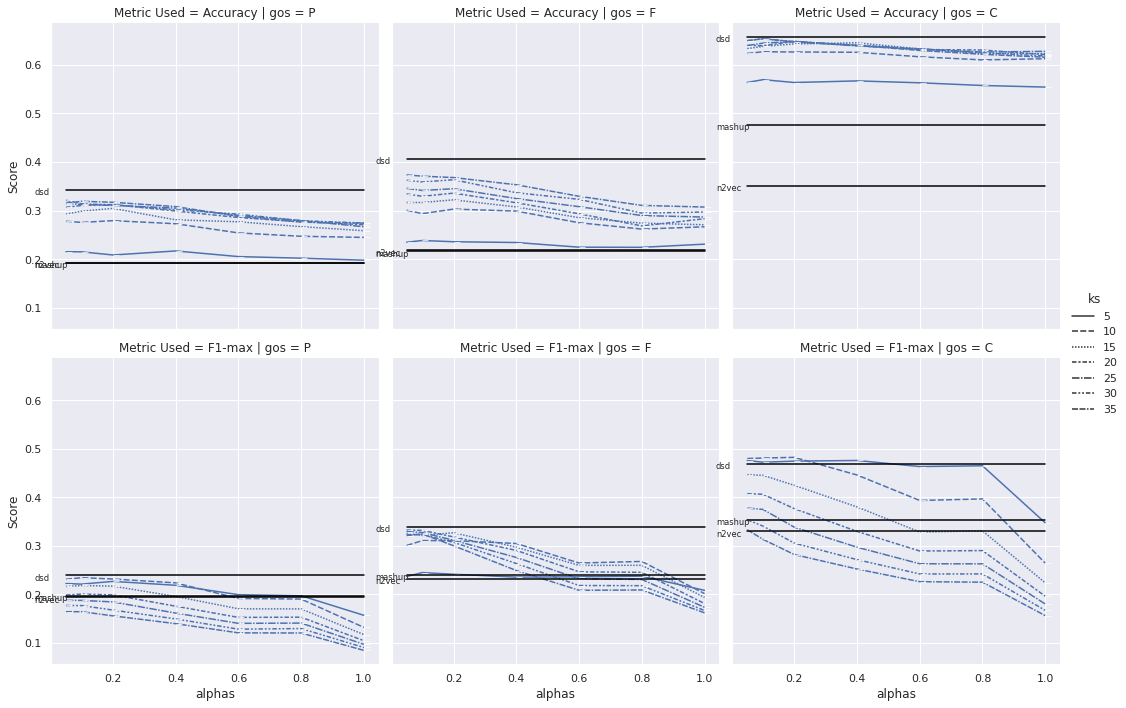

In [13]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_hm, x= "alphas", y="Score", col="gos", row="Metric Used",
                style = "ks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(falphas, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xy=(1,0.2), xytext=(-0.05,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xy=(1,0.2), xytext=(-0.05,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xy=(1,0.2), xytext=(-0.05,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/human_12000_biogrid-mouse_12000_biogrid/mouse_vs_alpha.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

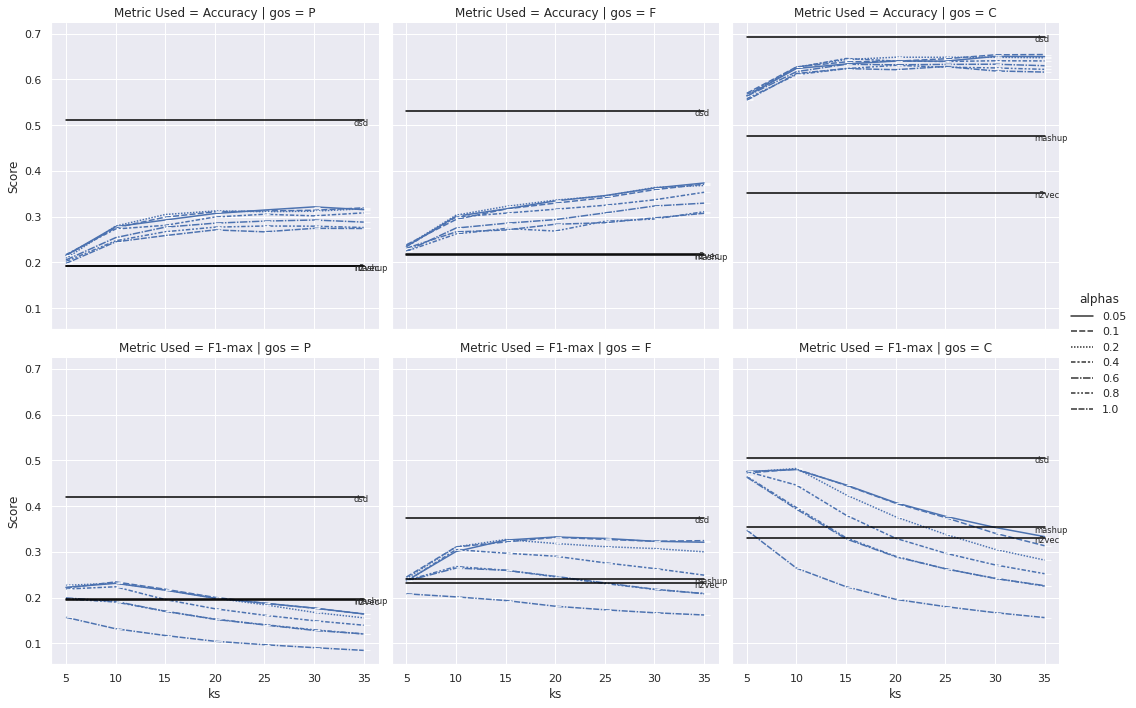

In [309]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_hm, x= "ks", y="Score", col="gos", row="Metric Used",
                style = "alphas", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/human_12000_biogrid-mouse_12000_biogrid/mouse_vs_ks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""

### UNIMUNDO - FISSION-YEAST BAKERS-YEAST

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "darkgrid")

df_bf = generate_table_results(ks, alphas, ["P", "F", "C"], "outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/")
df_bf_acc = df_bf.drop(["mean_f1", "std_f1"], axis = 1)
df_bf_f1  = df_bf.drop(["mean_acc", "std_acc"], axis = 1)

df_bf_acc = df_bf_acc.rename(columns = {"mean_acc": "Score", "std_acc":"std"})
df_bf_f1 = df_bf_f1.rename(columns = {"mean_f1": "Score", "std_f1": "std"})
df_bf_acc["Metric Used"] = "Accuracy"
df_bf_f1["Metric Used"]  = "F1-max"

df_comp_bf = pd.concat([df_bf_acc, df_bf_f1]).reset_index()
df_comp_bf["std"] = df_comp_bf["std"] 
df_comp_bf["alphas"] = df_comp_bf["alphas"].astype(float)

	GO: P
		 K: 5
			 ALPHA: 0.05, Accuracy: 0.2885095243399799 +- 0.023057216338639972			                   F1: 0.3254402457906447 +- 0.03247043499234874
			 ALPHA: 0.1, Accuracy: 0.28415394898072843 +- 0.043192772808986715			                   F1: 0.3106686954480296 +- 0.021214313464032047
			 ALPHA: 0.2, Accuracy: 0.29259774980505737 +- 0.025008522149462406			                   F1: 0.33070736240046145 +- 0.01947922093619164
			 ALPHA: 0.4, Accuracy: 0.2800155954104934 +- 0.026554664188731984			                   F1: 0.3286718679825533 +- 0.039151676456602245
			 ALPHA: 0.6, Accuracy: 0.2872786008688871 +- 0.02473604734373291			                   F1: 0.31586644385791907 +- 0.016883103150232212
			 ALPHA: 0.8, Accuracy: 0.2790186030968029 +- 0.03397129269763659			                   F1: 0.3258612293109894 +- 0.01974054132190733
			 ALPHA: 1.0, Accuracy: 0.28410382087557084 +- 0.05142324748651641			                   F1: 0.32122876592239524 +- 0.03595996750146116
		 K: 10
			 ALPHA: 0.05, 

			 ALPHA: 0.4, Accuracy: 0.6536723163841808 +- 0.024288036371414422			                   F1: 0.505549189541848 +- 0.049662296885782845
			 ALPHA: 0.6, Accuracy: 0.6615819209039547 +- 0.013196958900336809			                   F1: 0.47624654595186333 +- 0.03595579438722698
			 ALPHA: 0.8, Accuracy: 0.6706214689265536 +- 0.01893393059710478			                   F1: 0.47356654144039523 +- 0.016924406831114815
			 ALPHA: 1.0, Accuracy: 0.6618644067796611 +- 0.010017301257907984			                   F1: 0.3732837371547027 +- 0.017033528234369443
		 K: 20
			 ALPHA: 0.05, Accuracy: 0.5861581920903955 +- 0.05509379905322623			                   F1: 0.4615655895779332 +- 0.01640656754063236
			 ALPHA: 0.1, Accuracy: 0.5782485875706215 +- 0.08605741072427314			                   F1: 0.4642827574315665 +- 0.02752904241649871
			 ALPHA: 0.2, Accuracy: 0.6437853107344632 +- 0.015060763008549482			                   F1: 0.46520953716656566 +- 0.012906311314165161
			 ALPHA: 0.4, Accuracy: 0.6683615

[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

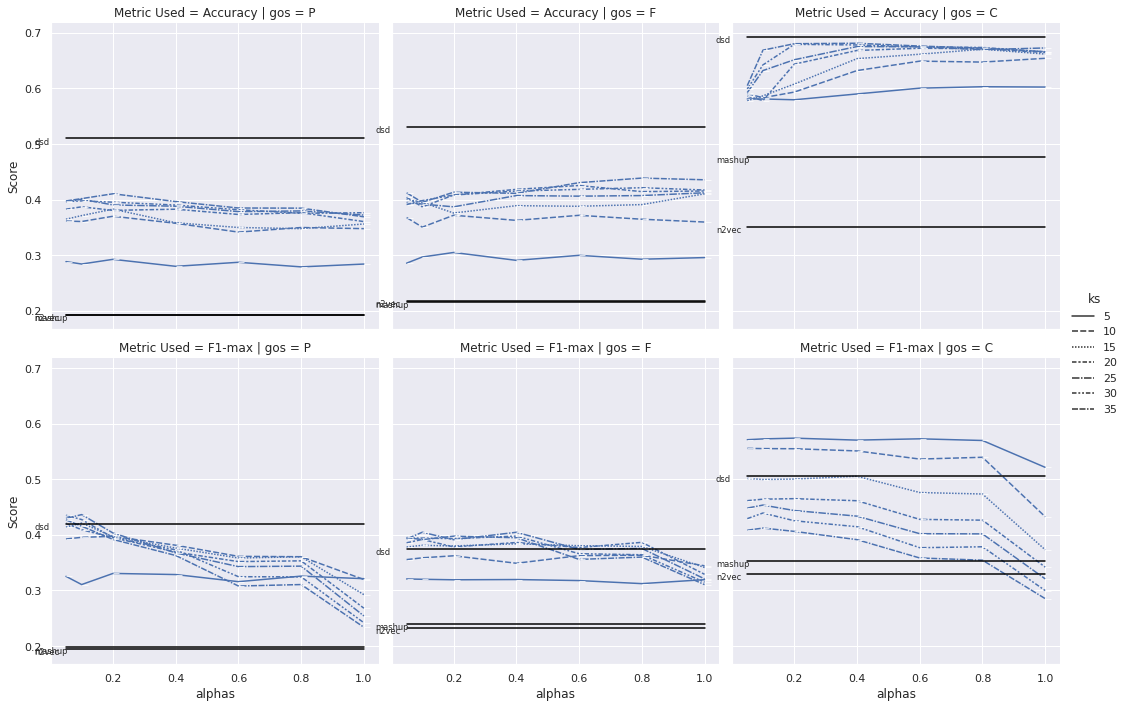

In [311]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_bf, x= "alphas", y="Score", col="gos", row="Metric Used",
                style = "ks", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(falphas, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xy=(1,0.2), xytext=(-0.05,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xy=(1,0.2), xytext=(-0.05,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(falphas, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xy=(1,0.2), xytext=(-0.05,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_alpha.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""


[0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677 0.1929677]
[0.21825293 0.21825293 0.21825293 0.21825293 0.21825293 0.21825293
 0.21825293]
[0.35069845 0.35069845 0.35069845 0.35069845 0.35069845 0.35069845
 0.35069845]
[0.19407207 0.19407207 0.19407207 0.19407207 0.19407207 0.19407207
 0.19407207]
[0.23227287 0.23227287 0.23227287 0.23227287 0.23227287 0.23227287
 0.23227287]
[0.32959253 0.32959253 0.32959253 0.32959253 0.32959253 0.32959253
 0.32959253]


'\nfor i, k in enumerate(ks):\n    for j, g in enumerate(["P", "F", "C"]):\n        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]\n        dc_a = dc[dc["Metric Used"] == "Accuracy"]\n        dc_f = dc[dc["Metric Used"] == "F1-max"]\n        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)\n        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)\np.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")\n'

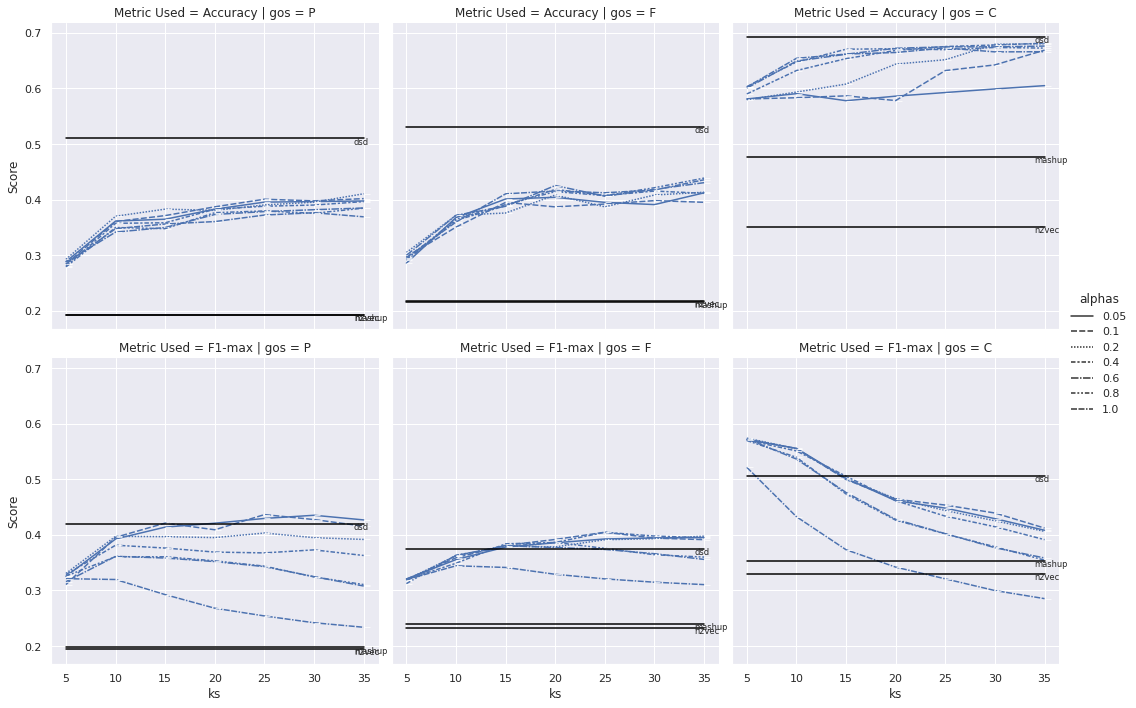

In [312]:
## SEEING THE VARIATION with VARIATION in "alphas"
p = sns.relplot(data = df_comp_bf, x= "ks", y="Score", col="gos", row="Metric Used",
                style = "alphas", kind = "line", marker = True)
for i, k in enumerate(["Accuracy", "F1-max"]):
    for j, g in enumerate(["P", "F", "C"]):
        n2vec  = df_mmap.loc[f"mouse_12000_biogrid-node2vec-{g}-{k}"]["best"]
        dsd    = df_mmap.loc[f"mouse_12000_biogrid-dsd-{g}-{k}"]["best"]
        mashup = df_mmap.loc[f"mouse_12000_biogrid-mashup-{g}-{k}"]["best"]
        print(n2vec * np.ones((len(falphas))))
        p.axes[i, j].plot(ks, n2vec * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("n2vec", xycoords = "data", xy=(5, n2vec), xytext=(34,n2vec-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, dsd * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("dsd", xycoords = "data", xy=(5, dsd), xytext=(34,dsd-0.01), fontsize = "x-small")
        p.axes[i, j].plot(ks, mashup * np.ones((len(falphas))), color = "black")
        p.axes[i, j].annotate("mashup", xycoords = "data", xy=(5, mashup), xytext=(34,mashup-0.01), fontsize = "x-small")
        
p.savefig("outputs/unimundo/bakers_yeast_biogrid-fission_yeast_biogrid/fission_vs_ks.png")
#p.map(sns.lineplot, ci = None)
"""
for i, k in enumerate(ks):
    for j, g in enumerate(["P", "F", "C"]):
        dc = df_comp.loc[(df_comp["ks"] == k) & (df_comp["gos"] == g), :]
        dc_a = dc[dc["Metric Used"] == "Accuracy"]
        dc_f = dc[dc["Metric Used"] == "F1-max"]
        p.axes[i, j].fill_between(dc_a["alphas"], dc_a["Score"] - dc_a["std"], dc_a["Score"] + dc_a["std"], color = "blue", alpha=0.15)
        p.axes[i, j].fill_between(dc_f["alphas"], dc_f["Score"] - dc_f["std"], dc_f["Score"] + dc_f["std"], color = "orange", alpha=0.15)
p.savefig("outputs/unimundo_outputs/bakers_yeast_biogrid-fission_yeast_biogrid/alphas_x_axis.png")
"""